In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head() # Ver los datos para tener una idea de lo que contiene el dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
print(df.shape) # Ver las dimensiones del dataset para saber cuántas features (columnas) e instancias (filas) tiene

(442, 11)


### Como hay algunas columnas (features) que están abreviadas, necesito saber qué significan esas features que no son tan claras para poder continuar

In [ ]:
diabetes.DESCR # Ver la descripción del dataset para tener una idea de lo que significan las features

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

### Limpieza de los datos (o en este caso simplemente asegurar que no haya datos faltantes para poder continuar)

In [ ]:
df.isnull().sum() # Ver si hay datos faltantes en el dataset

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


### Tras esto pude ver que no hay ningún dato faltante en el dataset, así que procedo a definir "X" y "y"

In [ ]:
# Con esto defino "X" y "y" para usarlas después al configurar el modelo (en este caso para X escogí el bmi)
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Añadir una columna de unos para el término de intercepción (bias)
X = np.c_[np.ones(X.shape[0]), X]

### Ahora que ya definí "X" y "y", y tras ver que no hay datos faltantes en ninguna de las features del dataset, ya puedo proceder a dividir el dataset en sets de train y test para luego empezar a desarrollar el modelo

In [ ]:
indices = np.arange(X.shape[0])
np.random.shuffle(indices) # esto para que al dividir el dataset se haga revuelto al azar para que el modelo se entrene de manera más realista
X = X[indices]
y = y[indices]
# Imprimo las dimensiones de las X y "y" que definí para asegurar que lo hice bien y pueda funcionar lo que sigue
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (442, 2)
Dimensiones de y: (442,)


In [ ]:
# Dividir el dataset en set de entrenamiento (80%) y set de testeo (20%)
dividir = int(0.8 * len(X))
X_train = X[:dividir]
X_test = X[dividir:]
y_train = y[:dividir]
y_test = y[dividir:]
# Imprimo las dimensiones de las variables de entrenamiento y testeo para asegurar que el dataset se dividió con la proporción correcta
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (353, 2)
Dimensiones de X_test: (89, 2)
Dimensiones de y_train: (353,)
Dimensiones de y_test: (89,)


### Ya habiendo funcionado todo lo anterior, ahora sí procedo a configurar el modelo (en este caso escogí el de regresión lineal con gradient descent) junto con sus funciones requeridas para que sea entrenado para poder hacer predicciones

In [ ]:
# Inicializar theta
theta = np.zeros(X_train.shape[1])

# Definir la cantidad de épocas de entrenamiento (epochs) y el alpha (learning rate)
epochs = 100000
alpha = 0.05

# Función de costo (MSE)
def MSE_costo(X, y, theta):
    m = len(y)
    predic = X @ theta
    costo = (1/2*m) * np.sum((predic - y) ** 2)
    return costo

# Función para el gradient descent
def grad(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = [] # Esto para poder guardar todos los costos que se vayan calculando durante las epochs mientras se entrena el modelo

    for epoch in range(epochs):
        predic = X @ theta
        error = predic - y
        gradient = (1/m) * (X.T @ error)
        theta = theta - alpha * gradient
        # Guardar el costo en cada epoch
        costo = MSE_costo(X, y, theta)
        cost_history.append(costo)

        # Imprimir el costo (loss) cada mil epochs para ir viendo el progreso del entrenamiento
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Costo (loss) = {costo}")
    return theta, cost_history

def predict(x, theta): # Esta función es para hacer una predicción con el modelo ya entrenado (le doy un valor "x" y arroja una predicción para "y")
    x = np.array([1, x])
    return x @ theta

### Ya que definí las funciones ahora sí procedo a entrenar el modelo

In [ ]:
# Entrenar el modelo
theta, cost_history = grad(X_train, y_train, theta, alpha, epochs)
# Predecir en el set de testeo
y_pred = X_test @ theta

Epoch 0: Costo (loss) = 1613406189.5244973
Epoch 1000: Costo (loss) = 329718515.275309
Epoch 2000: Costo (loss) = 313376882.16271293
Epoch 3000: Costo (loss) = 300074538.10307896
Epoch 4000: Costo (loss) = 289246222.7038986
Epoch 5000: Costo (loss) = 280431805.1953388
Epoch 6000: Costo (loss) = 273256731.9590079
Epoch 7000: Costo (loss) = 267416110.51162186
Epoch 8000: Costo (loss) = 262661753.61963406
Epoch 9000: Costo (loss) = 258791633.0066114
Epoch 10000: Costo (loss) = 255641294.50665894
Epoch 11000: Costo (loss) = 253076869.86550266
Epoch 12000: Costo (loss) = 250989388.23764917
Epoch 13000: Costo (loss) = 249290145.65641242
Epoch 14000: Costo (loss) = 247906935.7103411
Epoch 15000: Costo (loss) = 246780981.25508127
Epoch 16000: Costo (loss) = 245864436.77900946
Epoch 17000: Costo (loss) = 245118355.28992814
Epoch 18000: Costo (loss) = 244511033.32914856
Epoch 19000: Costo (loss) = 244016663.78715733
Epoch 20000: Costo (loss) = 243614239.2745729
Epoch 21000: Costo (loss) = 243286

### MSE

In [ ]:
# Calcular el Mean square error (MSE)
MSE = np.mean((y_pred - y_test) ** 2)
print(f"Mean square error: {MSE}") # Imprimir el MSE

Mean square error: 3945.659482171071


### Gráfica para ver los valores observados del dataset y la línea de regresión, la cual representa los valores predecidos por el modelo tras haber completado su entrenamiento

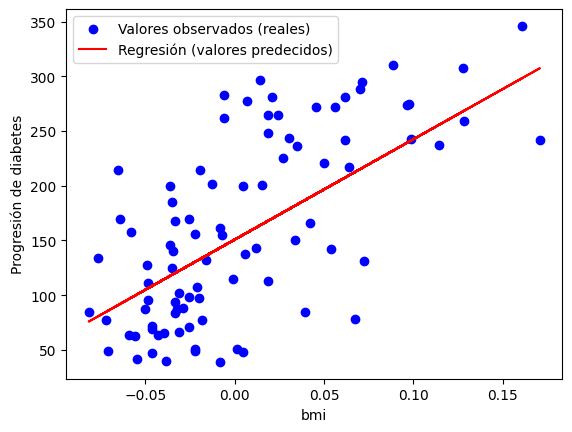

In [ ]:
# Imprimir gráfica
plt.scatter(X_test[:, 1], y_test, color='blue', label = 'Valores observados (reales)')
plt.plot(X_test[:, 1], y_pred, color='red', label = 'Regresión (valores predecidos)')
plt.xlabel('bmi')
plt.ylabel('Progresión de diabetes')
plt.legend()
plt.show()

### Aquí uso la función predict que había definido previamente para poder hacer predicciones ya con el modelo entrenado y al final muestro un ejemplo de una predicción

In [ ]:
# Hacer predicción con el modelo ya entrenado
x_new = 0.07
y_new = predict(x_new, theta)
print("Para x = {}, la predicción de 'y' es y = {}".format(x_new, y_new))

Para x = 0.07, la predicción de 'y' es y = 214.98547788114368


Gracias a la gráfica y la predicción que se hizo, se puede ver que ese ejemplo de predicción parece certero, ya que en la gráfica se puede ver la predicción para 0.05 y 0.10, y el ejemplo de x=0.07 tiene una predicción que se encuentra justo en medio de las predicciones para x=0.05 y x=0.10; además la gráfica parece que sí sigue la típica forma de una regresión lineal. Asimismo, se puede ver durante los prints de las epochs como poco a poco el modelo va ajustando el error (costo) luego de cada epoch, por lo que se puede decir que el modelo sí va aprendiendo conforme van pasando sus épocas de entrenamiento y al final se ve que puede ser capaz de hacer predicciones.